# 0. 설정

In [1]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 텐서플로 ≥2.0 필수
import tensorflow as tf
assert tf.__version__ >= "2.0"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

import pandas as pd

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

def plot_loss(history):
    plt.plot(pd.DataFrame(history.history))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.legend(('loss', 'v_loss'))
    plt.show()

# 1. 퍼셉트론 (p 360)

In [2]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
print(iris.data.shape)
print(iris.target.shape)

x = iris.data[:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = (iris.target == 0).astype(np.int)

print(x.shape, y.shape)
print('* 꽃잎의 길이 : ', x[:,0][:10], '...')
print('* 꽃잎의 너비 : ', x[:,1][:10], '...')

(150, 4)
(150,)
(150, 2) (150,)
* 꽃잎의 길이 :  [1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5] ...
* 꽃잎의 너비 :  [0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1] ...


In [3]:
per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(x, y)

x_test = [[2,0.5]]
y_pred = per_clf.predict(x_test)

print(x_test, y_pred)

[[2, 0.5]] [1]


# 2. 활성화 함수 (p 364)

* sigmoid = 1/1+e^(-x)

In [4]:
def sigmoid(z):
    return 1/(1+np.exp(-z))
    
def relu(z):
    return np.maximum(0, z)
    
def sign(z):
    return np.sign(z)

def tanh(z):
    return np.tanh(z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

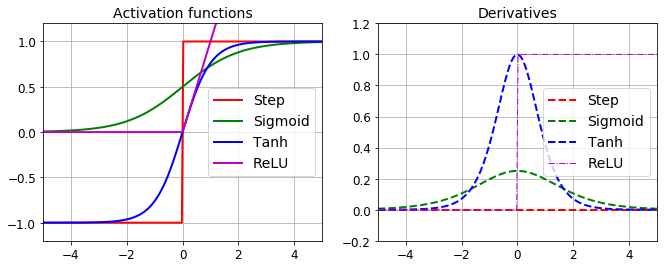

In [5]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, sign(z), "r-", linewidth=2, label="Step")
plt.plot(z, sigmoid(z), "g-", linewidth=2, label="Sigmoid")
plt.plot(z, tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r--", linewidth=2, label="Step")
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b--", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=1, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

# 3. Fanshion MNIST - 이미지 분류기 만들기 (p 371) 

## 3-1. 데이터 불러오기 

In [6]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train, x_test = x_train/255, x_test/255
print(x_train.shape, x_test.dtype)

(60000, 28, 28) float64


### 3-1.1 데이터 클래스 이름붙이기

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 
               'Dress', 'Coat', 'Sandal', 'Shirt',
               'Sneaker', 'Bag', 'Ankle boot'
              ]

## 3-2. 모델 구성

In [8]:
layers = [
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
]
model = tf.keras.models.Sequential(layers)

### 3-2.1 모델 플로팅하기

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


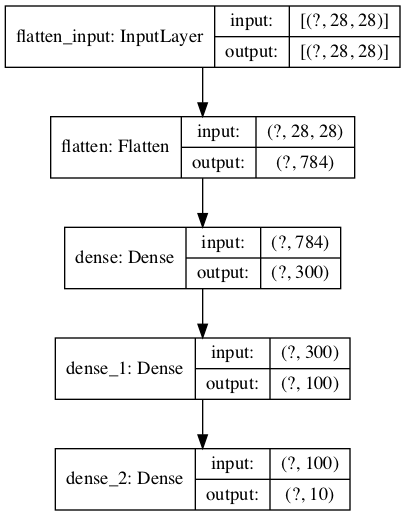

In [10]:
tf.keras.utils.plot_model(model, show_shapes=True)

### 3-2.2 레이어 뜯어보기

In [11]:
hidden1 = model.layers[1]
print('* hidden1 name: ', hidden1.name)

# You can get weights and biases with 2 methods.
weights, biases = hidden1.get_weights()
weights, biases = model.get_layer('dense').get_weights()
print('* hidden1 wheights and biases shape: ', weights.shape, biases.shape)

* hidden1 name:  dense
* hidden1 wheights and biases shape:  (784, 300) (300,)


#### Q) dense_1, dens_2의 weights와 biases shape을 예상하고 실제로 출력해보세요

In [12]:
hidden2 = model.layers[2]
weights, biases = hidden2.get_weights()
print('* hidden2 weights and biases shape: ', weights.shape, biases.shape)

hidden3 = model.layers[3]
weights, biases = hidden3.get_weights()
print('* hidden2 weights and biases shape: ', weights.shape, biases.shape)

* hidden2 weights and biases shape:  (300, 100) (100,)
* hidden2 weights and biases shape:  (100, 10) (10,)


## 3-3. 모델 컴파일
* 두 가지 코드 모두 똑같은 내용을 나타냅니다.


In [13]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [14]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=[tf.keras.metrics.sparse_categorical_accuracy])

## 3-4. 모델 평가

In [15]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 37us/sample - loss: 2.3416 - sparse_categorical_accuracy: 0.1050


[2.341562329864502, 0.105]

### 3-4.1 테스트셋 예측하기

* x_sampled :  (18, 28, 28)
* y_sampled :  (18,)
* y_predict :  (18, 10)


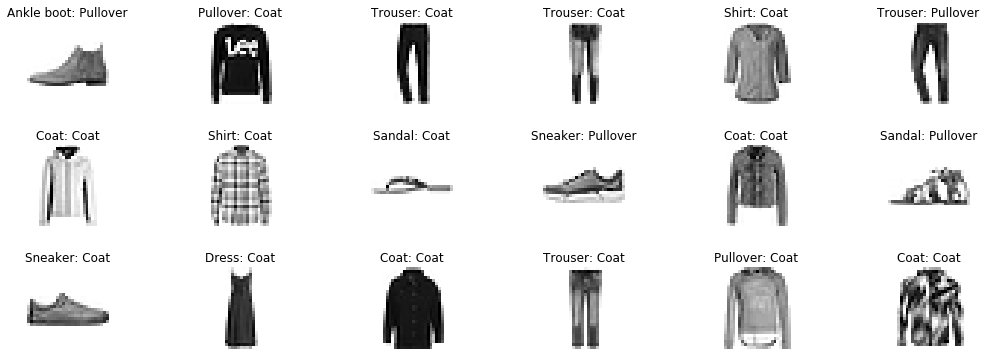

In [16]:
w, h = 6, 3

x_sample, y_sample = x_test[:w*h], y_test[:w*h]
y_pred = model.predict(x_sample)
print('* x_sampled : ', x_sample.shape)
print('* y_sampled : ', y_sample.shape)
print('* y_predict : ', y_pred.shape)

plt.figure(figsize=(w*3, h*2))

num=1
for image, index, pred,  in zip(x_sample, y_sample, y_pred):
    pred = np.argmax(pred)
    plt.subplot(h, w, num)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title('%s: %s'%(class_names[index], class_names[pred]), fontsize=12)
    num+=1
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## 3-5. 모델 학습

In [18]:
history = model.fit(x_train, y_train, epochs=3, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/3
48000/48000 [==============================] - 4s 75us/sample - loss: 0.5128 - sparse_categorical_accuracy: 0.8240 - val_loss: 0.4751 - val_sparse_categorical_accuracy: 0.8332
Epoch 2/3
48000/48000 [==============================] - 4s 74us/sample - loss: 0.4576 - sparse_categorical_accuracy: 0.8410 - val_loss: 0.4687 - val_sparse_categorical_accuracy: 0.8290
Epoch 3/3
48000/48000 [==============================] - 3s 72us/sample - loss: 0.4283 - sparse_categorical_accuracy: 0.8512 - val_loss: 0.4282 - val_sparse_categorical_accuracy: 0.8472


### 3-5.1 history 뜯어보기

In [19]:
history.params

{'batch_size': 32,
 'epochs': 3,
 'steps': 1500,
 'samples': 48000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss',
  'sparse_categorical_accuracy',
  'val_loss',
  'val_sparse_categorical_accuracy']}

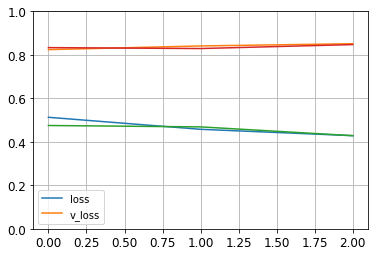

In [20]:
plot_loss(history)